In [ ]:
import pandas as pd
import numpy as np
import csv

# Logestic Regression by Yiling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Test_Set_PATH = 'Test_Set.csv'
Train_Set_PATH = 'Train_Set.csv'

train_data = pd.read_csv(Train_Set_PATH)
test_data = pd.read_csv(Test_Set_PATH)


X_train = train_data.iloc[:, :350]
y_train = (train_data['class_label'] != 'healthy').astype(int)

X_test = test_data.iloc[:, :350]
y_test = (test_data['class_label'] != 'healthy').astype(int)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Testing Classification Report:")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix for Testing Data:")
print(confusion_matrix(y_test, y_pred_test))

print("\nAccuracy Score for Testing Data:")
print(accuracy_score(y_test, y_pred_test))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.98      0.19        60
           1       1.00      0.77      0.87      2133

    accuracy                           0.77      2193
   macro avg       0.55      0.87      0.53      2193
weighted avg       0.97      0.77      0.85      2193

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.85      0.24        41
           1       0.99      0.78      0.87       993

    accuracy                           0.78      1034
   macro avg       0.56      0.82      0.55      1034
weighted avg       0.96      0.78      0.85      1034

Confusion Matrix for Testing Data:
[[ 35   6]
 [220 773]]

Accuracy Score for Testing Data:
0.781431334622824


References:
1. Ting, K.M. (2011). Confusion Matrix. In: Sammut, C., Webb, G.I. (eds) Encyclopedia of Machine Learning. Springer, Boston, MA. https://doi.org/10.1007/978-0-387-30164-8_157

2. Sklearn.linear_model.logisticregression. scikit. (2018). https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**Subsection 1: Screening Stage Cancer vs Healthy**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

Test_Set_PATH = 'Test_Set.csv'
Train_Set_PATH = 'Train_Set.csv'

Train_Data = pd.read_csv(Train_Set_PATH)
Test_Data = pd.read_csv(Test_Set_PATH)

filteredTrain = Train_Data[(Train_Data['class_label'] == 'screening stage cancer') | (Train_Data['class_label'] == 'healthy')]
filteredTest = Test_Data[(Test_Data['class_label'] == 'screening stage cancer') | (Test_Data['class_label'] =='healthy')]

X_Train = filteredTrain.drop('class_label', axis=1)
y_Train = filteredTrain['class_label']
X_Val = filteredTest.drop('class_label', axis=1)
y_Val = filteredTest['class_label']

# Feature scaling
scaler = StandardScaler()
X_Train_scaled, X_Val_scaled = scaler.fit_transform(X_Train), scaler.transform(X_Val)

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_Train_scaled, y_Train)

y_pred_train = log_reg.predict(X_Train_scaled)
y_pred_val = log_reg.predict(X_Val_scaled)

train_report = classification_report(y_Train, y_pred_train)
val_report = classification_report(y_Val, y_pred_val)

train_accuracy = accuracy_score(y_Train, y_pred_train)
val_accuracy = accuracy_score(y_Val, y_pred_val)

print(f'Training classification report:\n{train_report}')
print(f'Testing classification report:\n{val_report}')
print(f'Training accuracy: {train_accuracy}')
print(f'Testing accuracy: {val_accuracy}')


Training classification report:
                        precision    recall  f1-score   support

               healthy       0.21      0.67      0.32        60
screening stage cancer       0.94      0.69      0.80       490

              accuracy                           0.69       550
             macro avg       0.58      0.68      0.56       550
          weighted avg       0.86      0.69      0.74       550

Testing classification report:
                        precision    recall  f1-score   support

               healthy       0.20      0.59      0.30        41
screening stage cancer       0.89      0.58      0.70       230

              accuracy                           0.58       271
             macro avg       0.54      0.58      0.50       271
          weighted avg       0.78      0.58      0.64       271

Training accuracy: 0.6872727272727273
Testing accuracy: 0.5830258302583026


**Subsection 2: Early Stage Cancer vs Healthy**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

Test_Set_PATH = 'Test_Set.csv'
Train_Set_PATH = 'Train_Set.csv'

train_data = pd.read_csv(Train_Set_PATH)
test_data = pd.read_csv(Test_Set_PATH)

filteredTrain = Train_Data[(Train_Data['class_label'] == 'early stage cancer') | (Train_Data['class_label'] == 'healthy')]
filteredTest = Test_Data[(Test_Data['class_label'] == 'early stage cancer') | (Test_Data['class_label'] =='healthy')]

X_Train = filteredTrain.drop('class_label', axis=1)
y_Train = filteredTrain['class_label']
X_Val = filteredTest.drop('class_label', axis=1)
y_Val = filteredTest['class_label']

## Feature scaling
scaler = StandardScaler()
X_Train_scaled, X_Val_scaled = scaler.fit_transform(X_Train), scaler.transform(X_Val)

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_Train_scaled, y_Train)

y_pred_train = log_reg.predict(X_Train_scaled)
y_pred_val = log_reg.predict(X_Val_scaled)

train_report = classification_report(y_Train, y_pred_train)
val_report = classification_report(y_Val, y_pred_val)

train_accuracy = accuracy_score(y_Train, y_pred_train)
val_accuracy = accuracy_score(y_Val, y_pred_val)

print(f'Training classification report:\n{train_report}')
print(f'Testing classification report:\n{val_report}')
print(f'Training accuracy: {train_accuracy}')
print(f'Testing accuracy: {val_accuracy}')

Training classification report:
                    precision    recall  f1-score   support

early stage cancer       1.00      0.91      0.95       781
           healthy       0.45      0.97      0.61        60

          accuracy                           0.91       841
         macro avg       0.72      0.94      0.78       841
      weighted avg       0.96      0.91      0.93       841

Testing classification report:
                    precision    recall  f1-score   support

early stage cancer       0.99      0.90      0.94       368
           healthy       0.50      0.88      0.64        41

          accuracy                           0.90       409
         macro avg       0.74      0.89      0.79       409
      weighted avg       0.94      0.90      0.91       409

Training accuracy: 0.9131985731272295
Testing accuracy: 0.8997555012224939


**Receiver Operating Characteristic Curve**

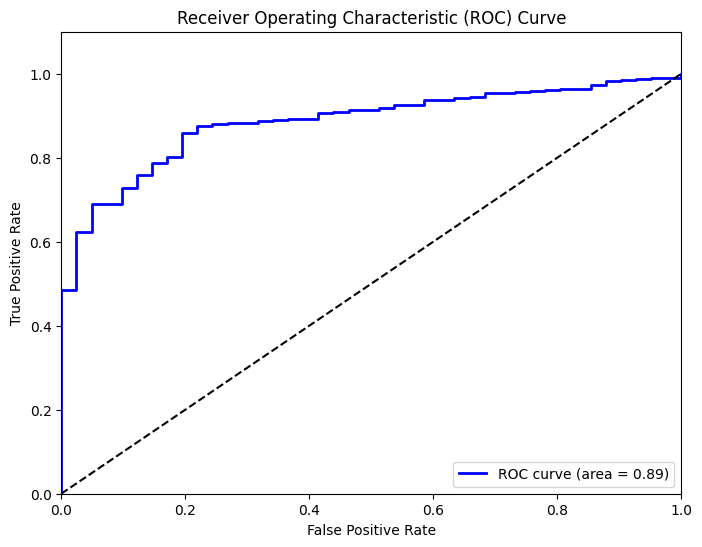

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Test_Set_PATH = 'Test_Set.csv'
Train_Set_PATH = 'Train_Set.csv'

train_data = pd.read_csv(Train_Set_PATH)
test_data = pd.read_csv(Test_Set_PATH)

X_train = train_data.iloc[:, :350]
y_train = (train_data['class_label'] != 'healthy').astype(int)

X_test = test_data.iloc[:, :350]
y_test = (test_data['class_label'] != 'healthy').astype(int)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Predict probabilities for positive class (class 1)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Support Vector Machine by Zheyuan

**Read Data**

In [ ]:
Test_Set_PATH = 'Test_Set.csv'
Train_Set_PATH = 'Train_Set.csv'

TrainData = pd.read_csv(Train_Set_PATH)
TestData = pd.read_csv(Test_Set_PATH)

In [ ]:
TrainData['class_label'].value_counts(), TestData['class_label'].value_counts()

**Cancer vs Healthy**

In [ ]:
from sklearn.preprocessing import StandardScaler

# 0: Healthy, 1: Any Cancer Stage
TrainData['binary_label'] = TrainData['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)
TestData['binary_label'] = TestData['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)

X_Train = TrainData.drop(['class_label', 'binary_label'], axis=1)[:-1]
y_Train = TrainData['binary_label'][:-1]
X_Val = TestData.drop(['class_label', 'binary_label'], axis=1)[:-1]
y_Val = TestData['binary_label'][:-1]

scaler = StandardScaler()
X_Train, X_Val = scaler.fit_transform(X_Train), scaler.transform(X_Val)

X_Train.shape, X_Val.shape, y_Train.value_counts(), y_Val.value_counts()

Training classification report: 
              precision    recall  f1-score   support

           0       0.10      0.98      0.18        60
           1       1.00      0.75      0.86      2132

    accuracy                           0.76      2192
   macro avg       0.55      0.87      0.52      2192
weighted avg       0.97      0.76      0.84      2192

Testing classification report: 
              precision    recall  f1-score   support

           0       0.13      0.83      0.23        41
           1       0.99      0.77      0.87       992

    accuracy                           0.77      1033
   macro avg       0.56      0.80      0.55      1033
weighted avg       0.96      0.77      0.84      1033

Training accuracy: 0.7577554744525548

Testing accuracy: 0.7744433688286544


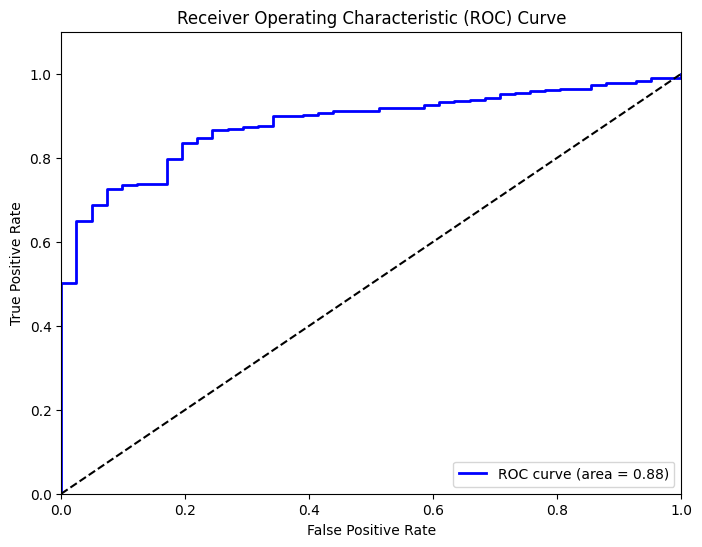

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

svm_clf = SVC(kernel='linear', probability=True, class_weight='balanced')
svm_clf.fit(X_Train, y_Train)

y_pred_train = svm_clf.predict(X_Train)
y_pred_val = svm_clf.predict(X_Val)

train_report = classification_report(y_Train, y_pred_train)
val_report = classification_report(y_Val, y_pred_val)

train_accuracy = accuracy_score(y_Train, y_pred_train)
val_accuracy = accuracy_score(y_Val, y_pred_val)

confusion_matrix = confusion_matrix(y_Val, y_pred_val)

print(f'Training classification report: \n{train_report}')
print(f'Testing classification report: \n{val_report}')
#print(f'Confusion matrix: \n{confusion_matrix}')
print(f'Training accuracy: {train_accuracy}')
print(f'\nTesting accuracy: {val_accuracy}')

y_pred_prob = svm_clf.predict_proba(X_Val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_Val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Screening Stage Cancer vs Healthy**

In [ ]:
filteredTrain = TrainData[(TrainData['class_label'] == 'screening stage cancer') | (TrainData['class_label'] == 'healthy')]
filteredTest = TestData[(TestData['class_label'] == 'screening stage cancer') | (TestData['class_label'] =='healthy')]

# 0: Healthy | 1: Screening Stage Cancer
X_Train = filteredTrain.drop(['class_label', 'binary_label'], axis=1)
y_Train = filteredTrain['binary_label']
X_Val = filteredTest.drop(['class_label', 'binary_label'], axis=1)
y_Val = filteredTest['binary_label']

scaler = StandardScaler()
X_Train, X_Val = scaler.fit_transform(X_Train), scaler.transform(X_Val)

X_Train.shape, X_Val.shape, y_Train.value_counts(), y_Val.value_counts()

In [ ]:
svm_clf = SVC(kernel='linear', probability=True, class_weight='balanced')
svm_clf.fit(X_Train, y_Train)

y_pred_train = svm_clf.predict(X_Train)
y_pred_val = svm_clf.predict(X_Val)

train_report = classification_report(y_Train, y_pred_train)
val_report = classification_report(y_Val, y_pred_val)

train_accuracy = accuracy_score(y_Train, y_pred_train)
val_accuracy = accuracy_score(y_Val, y_pred_val)

print(f'Training classification report: \n{train_report}')
print(f'Testing classification report: \n{val_report}')
print(f'Training accuracy: {train_accuracy}')
print(f'\nTesting accuracy: {val_accuracy}')

Training classification report: 
              precision    recall  f1-score   support

           0       0.18      0.68      0.29        60
           1       0.94      0.62      0.75       490

    accuracy                           0.63       550
   macro avg       0.56      0.65      0.52       550
weighted avg       0.86      0.63      0.70       550

Testing classification report: 
              precision    recall  f1-score   support

           0       0.20      0.56      0.29        41
           1       0.88      0.59      0.71       230

    accuracy                           0.59       271
   macro avg       0.54      0.58      0.50       271
weighted avg       0.78      0.59      0.65       271

Training accuracy: 0.6309090909090909

Testing accuracy: 0.5867158671586716


**Early Stage Cancer vs Healthy**

In [ ]:
filteredTrain = TrainData[(TrainData['class_label'] == 'early stage cancer') | (TrainData['class_label'] == 'healthy')]
filteredTest = TestData[(TestData['class_label'] == 'early stage cancer') | (TestData['class_label'] =='healthy')]

# 0: Healthy | 1: Early Stage Cancer
X_Train = filteredTrain.drop(['class_label', 'binary_label'], axis=1)
y_Train = filteredTrain['binary_label']
X_Val = filteredTest.drop(['class_label', 'binary_label'], axis=1)
y_Val = filteredTest['binary_label']

scaler = StandardScaler()
X_Train, X_Val = scaler.fit_transform(X_Train), scaler.transform(X_Val)

X_Train.shape, X_Val.shape, y_Train.value_counts(), y_Val.value_counts()

In [ ]:
svm_clf = SVC(kernel='linear', probability=True, class_weight='balanced')
svm_clf.fit(X_Train, y_Train)

y_pred_train = svm_clf.predict(X_Train)
y_pred_val = svm_clf.predict(X_Val)

train_report = classification_report(y_Train, y_pred_train)
val_report = classification_report(y_Val, y_pred_val)

train_accuracy = accuracy_score(y_Train, y_pred_train)
val_accuracy = accuracy_score(y_Val, y_pred_val)

print(f'Training classification report: \n{train_report}')
print(f'Testing classification report: \n{val_report}')
print(f'Training accuracy: {train_accuracy}')
print(f'\nTesting accuracy: {val_accuracy}')

Training classification report: 
              precision    recall  f1-score   support

           0       0.50      0.98      0.66        60
           1       1.00      0.92      0.96       781

    accuracy                           0.93       841
   macro avg       0.75      0.95      0.81       841
weighted avg       0.96      0.93      0.94       841

Testing classification report: 
              precision    recall  f1-score   support

           0       0.51      0.85      0.64        41
           1       0.98      0.91      0.94       368

    accuracy                           0.90       409
   macro avg       0.75      0.88      0.79       409
weighted avg       0.94      0.90      0.91       409

Training accuracy: 0.9274673008323424

Testing accuracy: 0.9046454767726161


References:
* Hearst, M. A., Dumais, S. T., Osuna, E., Platt, J., & Scholkopf, B. (1998). Support vector machines. IEEE Intelligent Systems and their applications, 13(4), 18-28.
* scikit learn. (2018). 1.4. Support Vector Machines — scikit-learn 0.20.3 documentation. Scikit-Learn.org. https://scikit-learn.org/stable/modules/svm.html
* Pisner, D. A., & Schnyer, D. M. (2020). Support vector machine. In Machine learning (pp. 101-121). Academic Press.

# Decision Tree and Random Forest by Jiarui


 Decision Tree:
              precision    recall  f1-score   support

           0       0.20      0.24      0.22        41
           1       0.97      0.96      0.96       993

    accuracy                           0.93      1034
   macro avg       0.58      0.60      0.59      1034
weighted avg       0.94      0.93      0.93      1034

[[ 10  31]
 [ 40 953]]

 Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.02      0.05        41
           1       0.96      1.00      0.98       993

    accuracy                           0.96      1034
   macro avg       0.98      0.51      0.51      1034
weighted avg       0.96      0.96      0.94      1034

[[  1  40]
 [  0 993]]


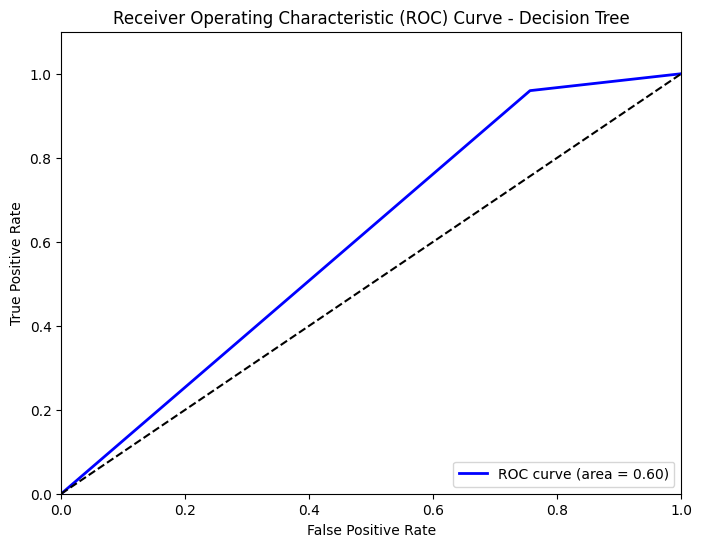

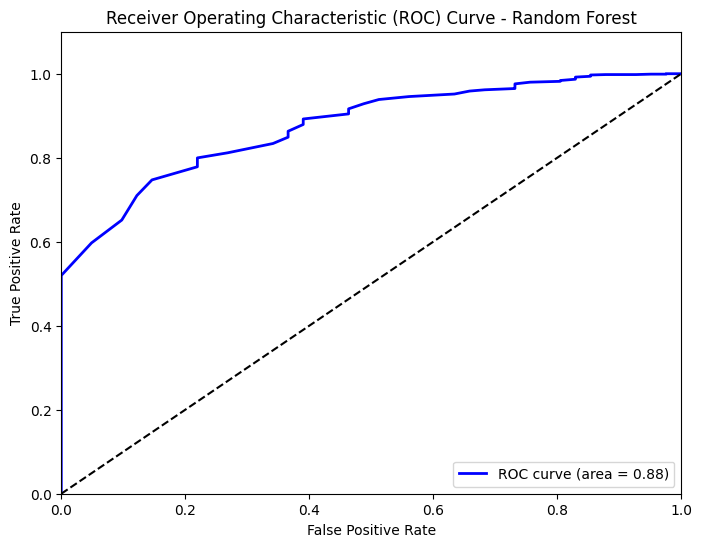

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Train_data = 'Train_Set.csv'
Test_data = 'Test_Set.csv'

Train_dataset = pd.read_csv(Train_data)
Test_dataset = pd.read_csv(Test_data)

int_label = {'healthy': 0, 'screening stage cancer': 1,
              'early stage cancer': 1, 'mid stage cancer': 1,
              'late stage cancer': 1}

Train_dataset['Int_label'] = Train_dataset['class_label'].map(int_label)
Test_dataset['Int_label'] = Test_dataset['class_label'].map(int_label)

Train_X = Train_dataset.iloc[:, :350]
Test_X = Test_dataset.iloc[:, :350]
Train_y = Train_dataset['Int_label']
Test_y = Test_dataset['Int_label']

scaler = StandardScaler()
Train_X = scaler.fit_transform(Train_X)
Test_X = scaler.transform(Test_X)

decision_tree = DecisionTreeClassifier(random_state=0, class_weight='balanced')
decision_tree.fit(Train_X, Train_y)
random_forest = RandomForestClassifier(random_state=0, class_weight='balanced')
random_forest.fit(Train_X, Train_y)

Pred_y_DT = decision_tree.predict(Test_X)
Pred_y_RF = random_forest.predict(Test_X)

classification_report_DT = classification_report(Test_y, Pred_y_DT)
confusion_matrix_DT = confusion_matrix(Test_y, Pred_y_DT)
accuracy_DT = accuracy_score(Test_y, Pred_y_DT)
classification_report_RF = classification_report(Test_y, Pred_y_RF)
confusion_matrix_RF = confusion_matrix(Test_y, Pred_y_RF)
accuracy_RF = accuracy_score(Test_y, Pred_y_RF)

print('\n Decision Tree:')
print(classification_report_DT)
print(confusion_matrix_DT)
print('\n Random Forest:')
print(classification_report_RF)
print(confusion_matrix_RF)

y_pred_prob_DT = decision_tree.predict_proba(Test_X)[:, 1]
y_pred_prob_RF = random_forest.predict_proba(Test_X)[:, 1]

fpr_DT, tpr_DT, thresholds_DT = roc_curve(Test_y, y_pred_prob_DT)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(Test_y, y_pred_prob_RF)
roc_auc_DT = auc(fpr_DT, tpr_DT)
roc_auc_RF = auc(fpr_RF, tpr_RF)

plt.figure(figsize=(8, 6))
plt.plot(fpr_DT, tpr_DT, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_DT)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

**Screening Stage Cancer vs. Healthy**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

Train_data = 'Train_Set.csv'
Test_data = 'Test_Set.csv'

Train_dataset = pd.read_csv(Train_data)
Test_dataset = pd.read_csv(Test_data)

int_label = {'healthy': 0, 'screening stage cancer': 1}

Train_dataset['Int_label'] = Train_dataset['class_label'].map(int_label)
Test_dataset['Int_label'] = Test_dataset['class_label'].map(int_label)

Train_dataset = Train_dataset.dropna(subset=['Int_label']).reset_index(drop=True)
Test_dataset = Test_dataset.dropna(subset=['Int_label']).reset_index(drop=True)

Train_dataset['Int_label'] = Train_dataset['Int_label'].astype(int)
Test_dataset['Int_label'] = Test_dataset['Int_label'].astype(int)

Train_X = Train_dataset.iloc[:, :350]
Test_X = Test_dataset.iloc[:, :350]
Train_y = Train_dataset['Int_label']
Test_y = Test_dataset['Int_label']

scaler = StandardScaler()
Train_X = scaler.fit_transform(Train_X)
Test_X = scaler.transform(Test_X)

decision_tree = DecisionTreeClassifier(random_state=0, class_weight='balanced')
decision_tree.fit(Train_X, Train_y)
random_forest = RandomForestClassifier(random_state=0, class_weight='balanced')
random_forest.fit(Train_X, Train_y)

Pred_y_DT = decision_tree.predict(Test_X)
Pred_y_DT_train = decision_tree.predict(Train_X)
Pred_y_RF = random_forest.predict(Test_X)
Pred_y_RF_train = random_forest.predict(Train_X)

classification_report_DT = classification_report(Test_y, Pred_y_DT)
confusion_matrix_DT = confusion_matrix(Test_y, Pred_y_DT)
accuracy_DT = accuracy_score(Test_y, Pred_y_DT)
accuracy_DT_train = accuracy_score(Train_y, Pred_y_DT_train)
classification_report_RF = classification_report(Test_y, Pred_y_RF)
confusion_matrix_RF = confusion_matrix(Test_y, Pred_y_RF)
accuracy_RF = accuracy_score(Test_y, Pred_y_RF)
accuracy_RF_train = accuracy_score(Train_y, Pred_y_RF_train)

print('\nDecision Tree:')
print(classification_report_DT)
print(confusion_matrix_DT)
print(f'\nTraining accuracy: {accuracy_DT_train}')
# Training accuracy would be 1.0 because 'max_depth=None'
#   would capture all features in the training dataset.
print(f'\nTesting accuracy: {accuracy_DT}')
print('\nRandom Forest:')
print(classification_report_RF)
print(confusion_matrix_RF)
print(f'\nTraining accuracy: {accuracy_RF_train}')
print(f'\nTesting accuracy: {accuracy_RF}')


Decision Tree:
              precision    recall  f1-score   support

           0       0.28      0.41      0.33        41
           1       0.89      0.81      0.85       230

    accuracy                           0.75       271
   macro avg       0.58      0.61      0.59       271
weighted avg       0.79      0.75      0.77       271

[[ 17  24]
 [ 44 186]]

Training accuracy: 1.0

Testing accuracy: 0.7490774907749077

Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.02      0.05        41
           1       0.85      1.00      0.92       230

    accuracy                           0.85       271
   macro avg       0.93      0.51      0.48       271
weighted avg       0.87      0.85      0.79       271

[[  1  40]
 [  0 230]]

Training accuracy: 1.0

Testing accuracy: 0.8523985239852399


**Early Stage Cancer vs. Healthy**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

Train_data = 'Train_Set.csv'
Test_data = 'Test_Set.csv'

Train_dataset = pd.read_csv(Train_data)
Test_dataset = pd.read_csv(Test_data)

int_label = {'healthy': 0, 'early stage cancer': 1}

Train_dataset['Int_label'] = Train_dataset['class_label'].map(int_label)
Test_dataset['Int_label'] = Test_dataset['class_label'].map(int_label)

Train_dataset = Train_dataset.dropna(subset=['Int_label']).reset_index(drop=True)
Test_dataset = Test_dataset.dropna(subset=['Int_label']).reset_index(drop=True)

Train_dataset['Int_label'] = Train_dataset['Int_label'].astype(int)
Test_dataset['Int_label'] = Test_dataset['Int_label'].astype(int)

Train_X = Train_dataset.iloc[:, :350]
Test_X = Test_dataset.iloc[:, :350]
Train_y = Train_dataset['Int_label']
Test_y = Test_dataset['Int_label']

scaler = StandardScaler()
Train_X = scaler.fit_transform(Train_X)
Test_X = scaler.transform(Test_X)

decision_tree = DecisionTreeClassifier(random_state=0, class_weight='balanced')
decision_tree.fit(Train_X, Train_y)
random_forest = RandomForestClassifier(random_state=0, class_weight='balanced')
random_forest.fit(Train_X, Train_y)

Pred_y_DT = decision_tree.predict(Test_X)
Pred_y_DT_train = decision_tree.predict(Train_X)
Pred_y_RF = random_forest.predict(Test_X)
Pred_y_RF_train = random_forest.predict(Train_X)

classification_report_DT = classification_report(Test_y, Pred_y_DT)
confusion_matrix_DT = confusion_matrix(Test_y, Pred_y_DT)
accuracy_DT = accuracy_score(Test_y, Pred_y_DT)
accuracy_DT_train = accuracy_score(Train_y, Pred_y_DT_train)
classification_report_RF = classification_report(Test_y, Pred_y_RF)
confusion_matrix_RF = confusion_matrix(Test_y, Pred_y_RF)
accuracy_RF = accuracy_score(Test_y, Pred_y_RF)
accuracy_RF_train = accuracy_score(Train_y, Pred_y_RF_train)

print('\nDecision Tree:')
print(classification_report_DT)
print(confusion_matrix_DT)
print(f'\nTraining accuracy: {accuracy_DT_train}')
# Training accuracy would be 1.0 because 'max_depth=None'
#   would capture all features in the training dataset.
print(f'\nTesting accuracy: {accuracy_DT}')
print('\nRandom Forest:')
print(classification_report_RF)
print(confusion_matrix_RF)
print(f'\nTraining accuracy: {accuracy_RF_train}')
print(f'\nTesting accuracy: {accuracy_RF}')


Decision Tree:
              precision    recall  f1-score   support

           0       0.37      0.54      0.44        41
           1       0.95      0.90      0.92       368

    accuracy                           0.86       409
   macro avg       0.66      0.72      0.68       409
weighted avg       0.89      0.86      0.87       409

[[ 22  19]
 [ 37 331]]

Training accuracy: 1.0

Testing accuracy: 0.863080684596577

Random Forest:
              precision    recall  f1-score   support

           0       0.50      0.39      0.44        41
           1       0.93      0.96      0.94       368

    accuracy                           0.90       409
   macro avg       0.72      0.67      0.69       409
weighted avg       0.89      0.90      0.89       409

[[ 16  25]
 [ 16 352]]

Training accuracy: 1.0

Testing accuracy: 0.8997555012224939


References:
* L. Breiman, J. Friedman, R. Olshen, and C. Stone, “Classification and Regression Trees”, Wadsworth, Belmont, CA, 1984.
* T. Hastie, R. Tibshirani and J. Friedman. “Elements of Statistical Learning”, Springer, 2009.
* L. Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.

# ANN by Hui En

**healthy vs cancer**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

# read dataset
train_df = pd.read_csv('Train_Set.csv')
test_df = pd.read_csv('Test_Set.csv')

# extract input dataset
train_x = train_df.drop(columns=['class_label'])
test_x = test_df.drop(columns=['class_label'])

# extract label (output)
# 0 - healthy
# 1 - cancer
train_y = train_df[['class_label']]
train_y['binary'] = train_y['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)
test_y = test_df[['class_label']]
test_y['binary'] = test_y['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)

# oversampling
x_resampled, y_resampled = SMOTE().fit_resample(train_x, train_y['binary'])

# feature scaling
scaler = MinMaxScaler()
t_train_x = scaler.fit_transform(x_resampled)
t_test_x = scaler.transform(test_x)

<ipython-input-1-ee020948260e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y['binary'] = train_y['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)
<ipython-input-1-ee020948260e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_y['binary'] = test_y['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)


In [ ]:
model = keras.Sequential([
        keras.layers.Dense(units=32, activation="relu", input_shape=(t_train_x.shape[-1],) ),
        # randomly delete 20% of the input units below, regularization to reduce overfitting
        keras.layers.Dropout(0.2),
        keras.layers.Dense(units=10, activation="relu"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),]
)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy']
)

model.fit(t_train_x, y_resampled, epochs=50, batch_size=100)

Epoch 1/50
43/43 [==============================] - 1s 2ms/step - loss: 0.6786 - accuracy: 0.5408
Epoch 2/50
43/43 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.6835
Epoch 3/50
43/43 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.7201
Epoch 4/50
43/43 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7436
Epoch 5/50
43/43 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.7571
Epoch 6/50
43/43 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7623
Epoch 7/50
43/43 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7630
Epoch 8/50
43/43 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7726
Epoch 9/50
43/43 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7768
Epoch 10/50
43/43 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7714
Epoch 11/50
43/43 [

In [ ]:
accuracy = model.evaluate(t_test_x, test_y['binary'])
print('Loss = ',accuracy[0])
print('Accuracy = ',accuracy[1])

predicted = model.predict(t_test_x)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])

classification_mm_1 = classification_report(test_y['binary'], predicted)
print(classification_mm_1)

33/33 [==============================] - 0s 1ms/step - loss: 0.5393 - accuracy: 0.7340
Loss =  0.5393275022506714
Accuracy =  0.7340425252914429
33/33 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.11      0.80      0.19        41
           1       0.99      0.73      0.84       993

    accuracy                           0.73      1034
   macro avg       0.55      0.77      0.52      1034
weighted avg       0.95      0.73      0.82      1034



**ROC Curve**

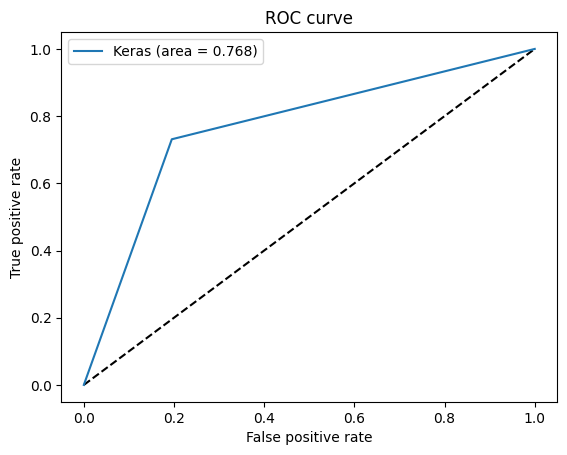

In [ ]:
# roc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y['binary'], predicted)

auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**healthy vs screening stage**

In [ ]:
# filter data
f_train = train_df[(train_df['class_label'] == 'healthy') | (train_df['class_label'] == 'screening stage cancer')]
f_test = test_df[(test_df['class_label'] == 'healthy') | (test_df['class_label'] == 'screening stage cancer')]
train_x = f_train.drop(columns=['class_label'])
test_x = f_test.drop(columns=['class_label'])

# extract label
# 0 - healthy
# 1 - screening
train_y = f_train[['class_label']]
train_y['binary'] = train_y['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)
test_y = f_test[['class_label']]
test_y['binary'] = test_y['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)

# oversampling
x_resampled, y_resampled = SMOTE().fit_resample(train_x, train_y['binary'])

# feature scaling
scaler = MinMaxScaler()
t_train_x = scaler.fit_transform(x_resampled)
t_test_x = scaler.transform(test_x)

<ipython-input-5-777c02cc8db1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y['binary'] = train_y['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)
<ipython-input-5-777c02cc8db1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_y['binary'] = test_y['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)


In [ ]:
model.fit(t_train_x, y_resampled, epochs=50, batch_size=100)

Epoch 1/50
10/10 [==============================] - 0s 4ms/step - loss: 3.5729 - accuracy: 0.5194
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.5031
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7012 - accuracy: 0.5051
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6953 - accuracy: 0.5133
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6944 - accuracy: 0.5163
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5133
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5184
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5031
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5133
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5276
Epoch 11/50
10/10 [

In [ ]:
accuracy = model.evaluate(t_test_x, test_y['binary'])
print('Loss = ',accuracy[0])
print('Accuracy = ',accuracy[1])

predicted = model.predict(t_test_x)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])

classification_mm_1 = classification_report(test_y['binary'], predicted)
print(classification_mm_1)

9/9 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.7454
Loss =  0.6983321309089661
Accuracy =  0.7453874349594116
9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.20      0.22      0.21        41
           1       0.86      0.84      0.85       230

    accuracy                           0.75       271
   macro avg       0.53      0.53      0.53       271
weighted avg       0.76      0.75      0.75       271



**healthy vs early stage**

In [ ]:
# filter data
f_train = train_df[(train_df['class_label'] == 'healthy') | (train_df['class_label'] == 'early stage cancer')]
f_test = test_df[(test_df['class_label'] == 'healthy') | (test_df['class_label'] == 'early stage cancer')]
train_x = f_train.drop(columns=['class_label'])
test_x = f_test.drop(columns=['class_label'])

# extract label
# 0 - healthy
# 1 - early
train_y = f_train[['class_label']]
train_y['binary'] = train_y['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)
test_y = f_test[['class_label']]
test_y['binary'] = test_y['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)

# oversampling
x_resampled, y_resampled = SMOTE().fit_resample(train_x, train_y['binary'])

# feature scaling
scaler = MinMaxScaler()
t_train_x = scaler.fit_transform(x_resampled)
t_test_x = scaler.transform(test_x)

<ipython-input-8-8669f504df34>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y['binary'] = train_y['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)
<ipython-input-8-8669f504df34>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_y['binary'] = test_y['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)


In [ ]:
accuracy = model.evaluate(t_test_x, test_y['binary'])
print('Loss = ',accuracy[0])
print('Accuracy = ',accuracy[1])

predicted = model.predict(t_test_x)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])

classification_mm_1 = classification_report(test_y['binary'], predicted)
print(classification_mm_1)

13/13 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.7531
Loss =  0.6857697367668152
Accuracy =  0.7530562281608582
13/13 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.23      0.63      0.34        41
           1       0.95      0.77      0.85       368

    accuracy                           0.75       409
   macro avg       0.59      0.70      0.59       409
weighted avg       0.88      0.75      0.80       409

